In [6]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from timedelay import TimeDelay

Let's download MAST data of the binary KIC 9651065 and load it into the module.

In [3]:
td = TimeDelay.from_archive('KIC 9651065', max_peaks=4, fmin=5., fmax=45.)

Text(0, 0.5, 'Magnitude [mag]')

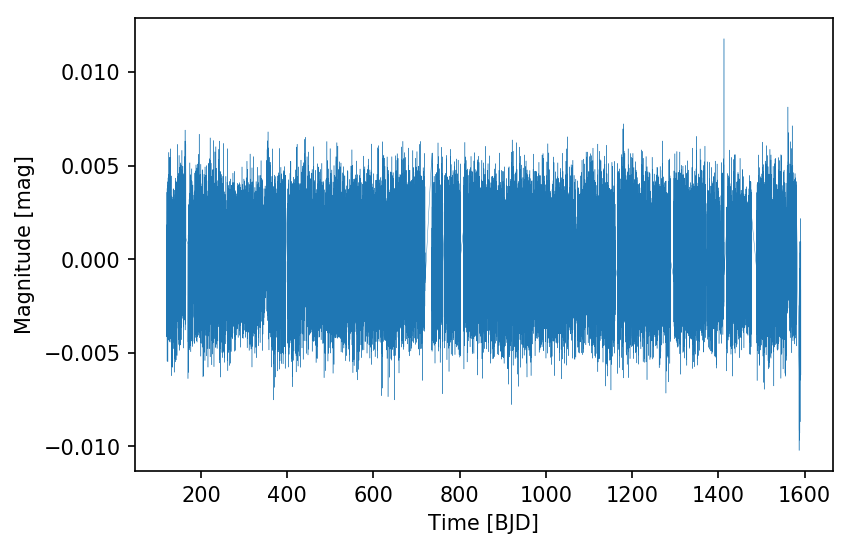

In [7]:
plt.plot(td.times, td.mags, linewidth=0.2)
plt.xlabel('Time [BJD]')
plt.ylabel('Magnitude [mag]')

`first_look()` is a convenience function which, as it's name suggests, is a quick way to get the gist of the star and its time delay

100%|██████████| 65266/65266 [00:00<00:00, 711356.02it/s]


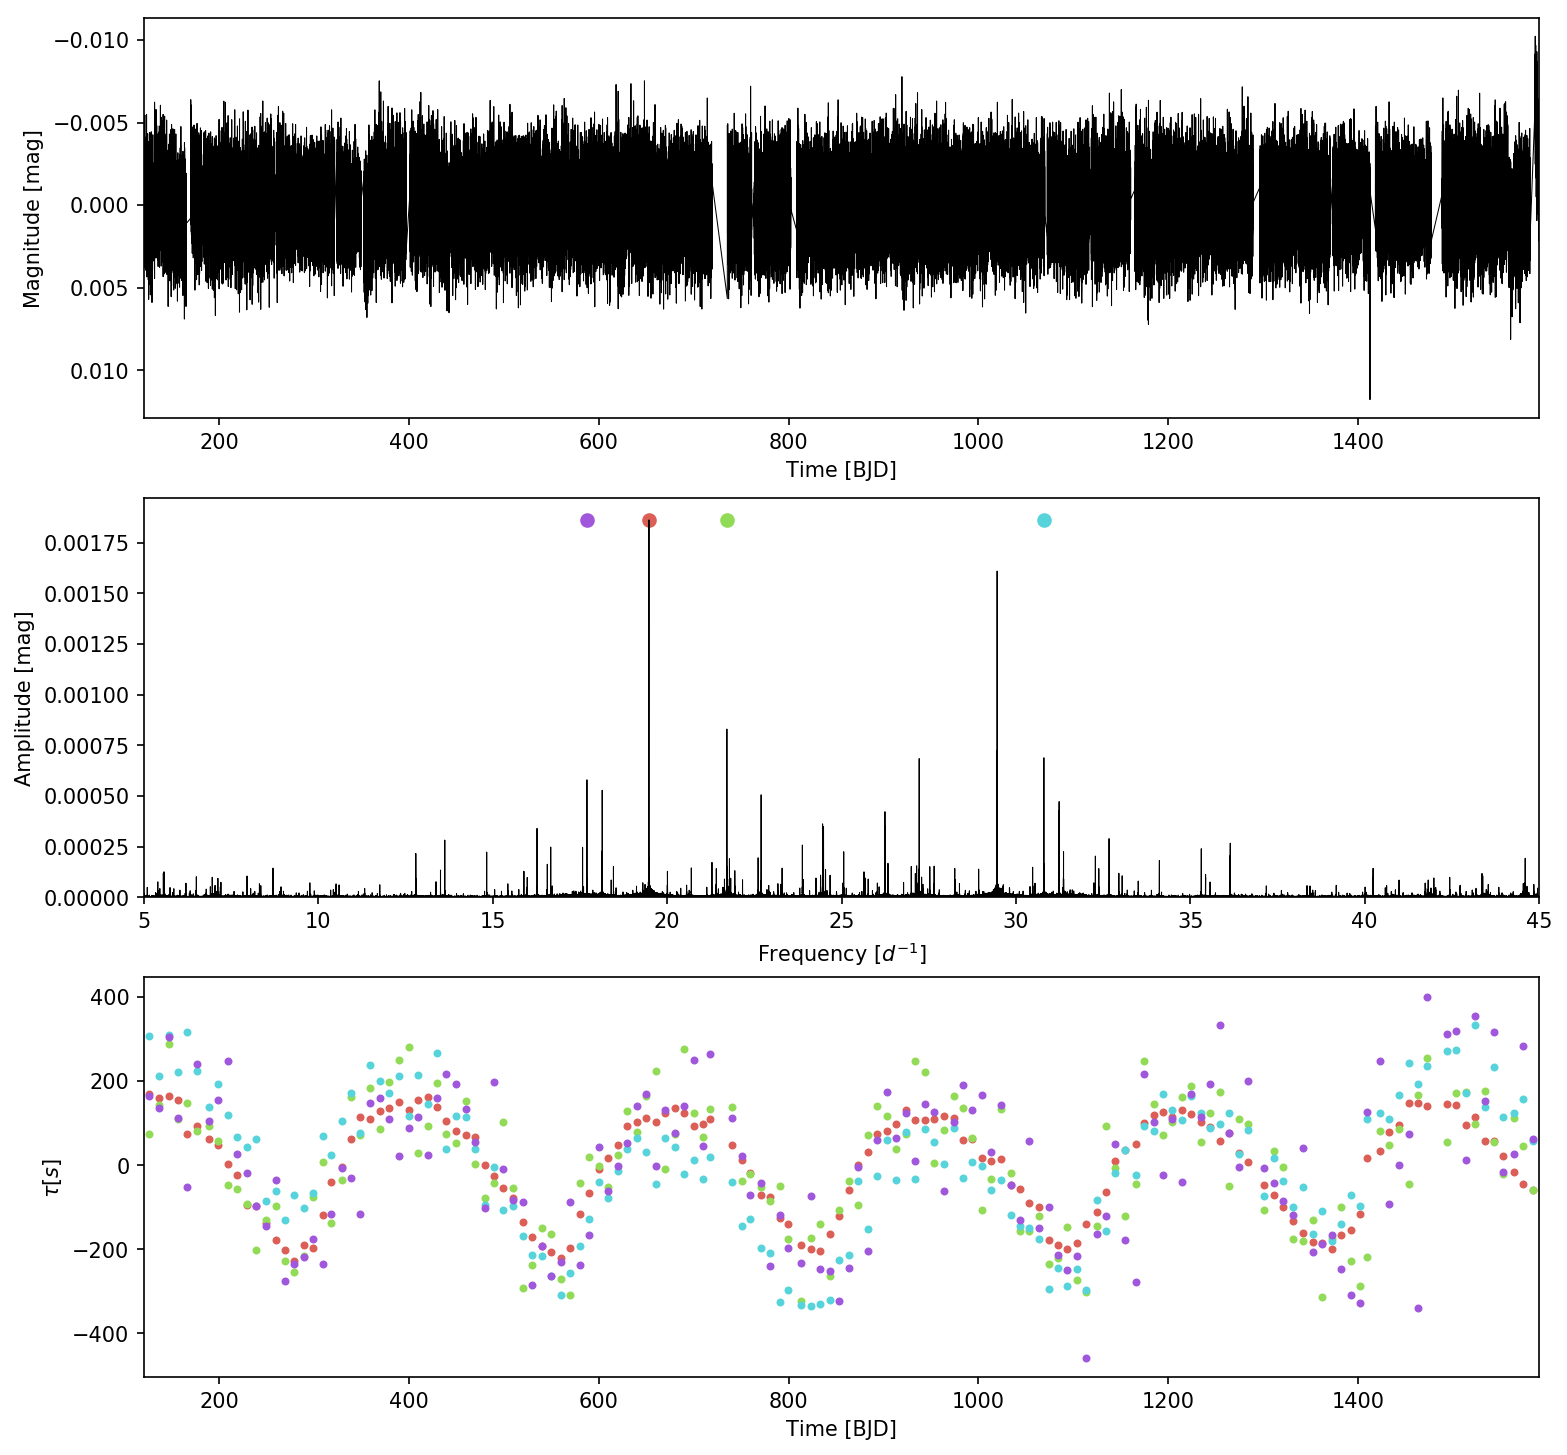

In [8]:
td.first_look()

Alternatively, if you have your own lightcurve and frequencies we can pass them in manually:

100%|██████████| 64028/64028 [00:00<00:00, 825491.11it/s]


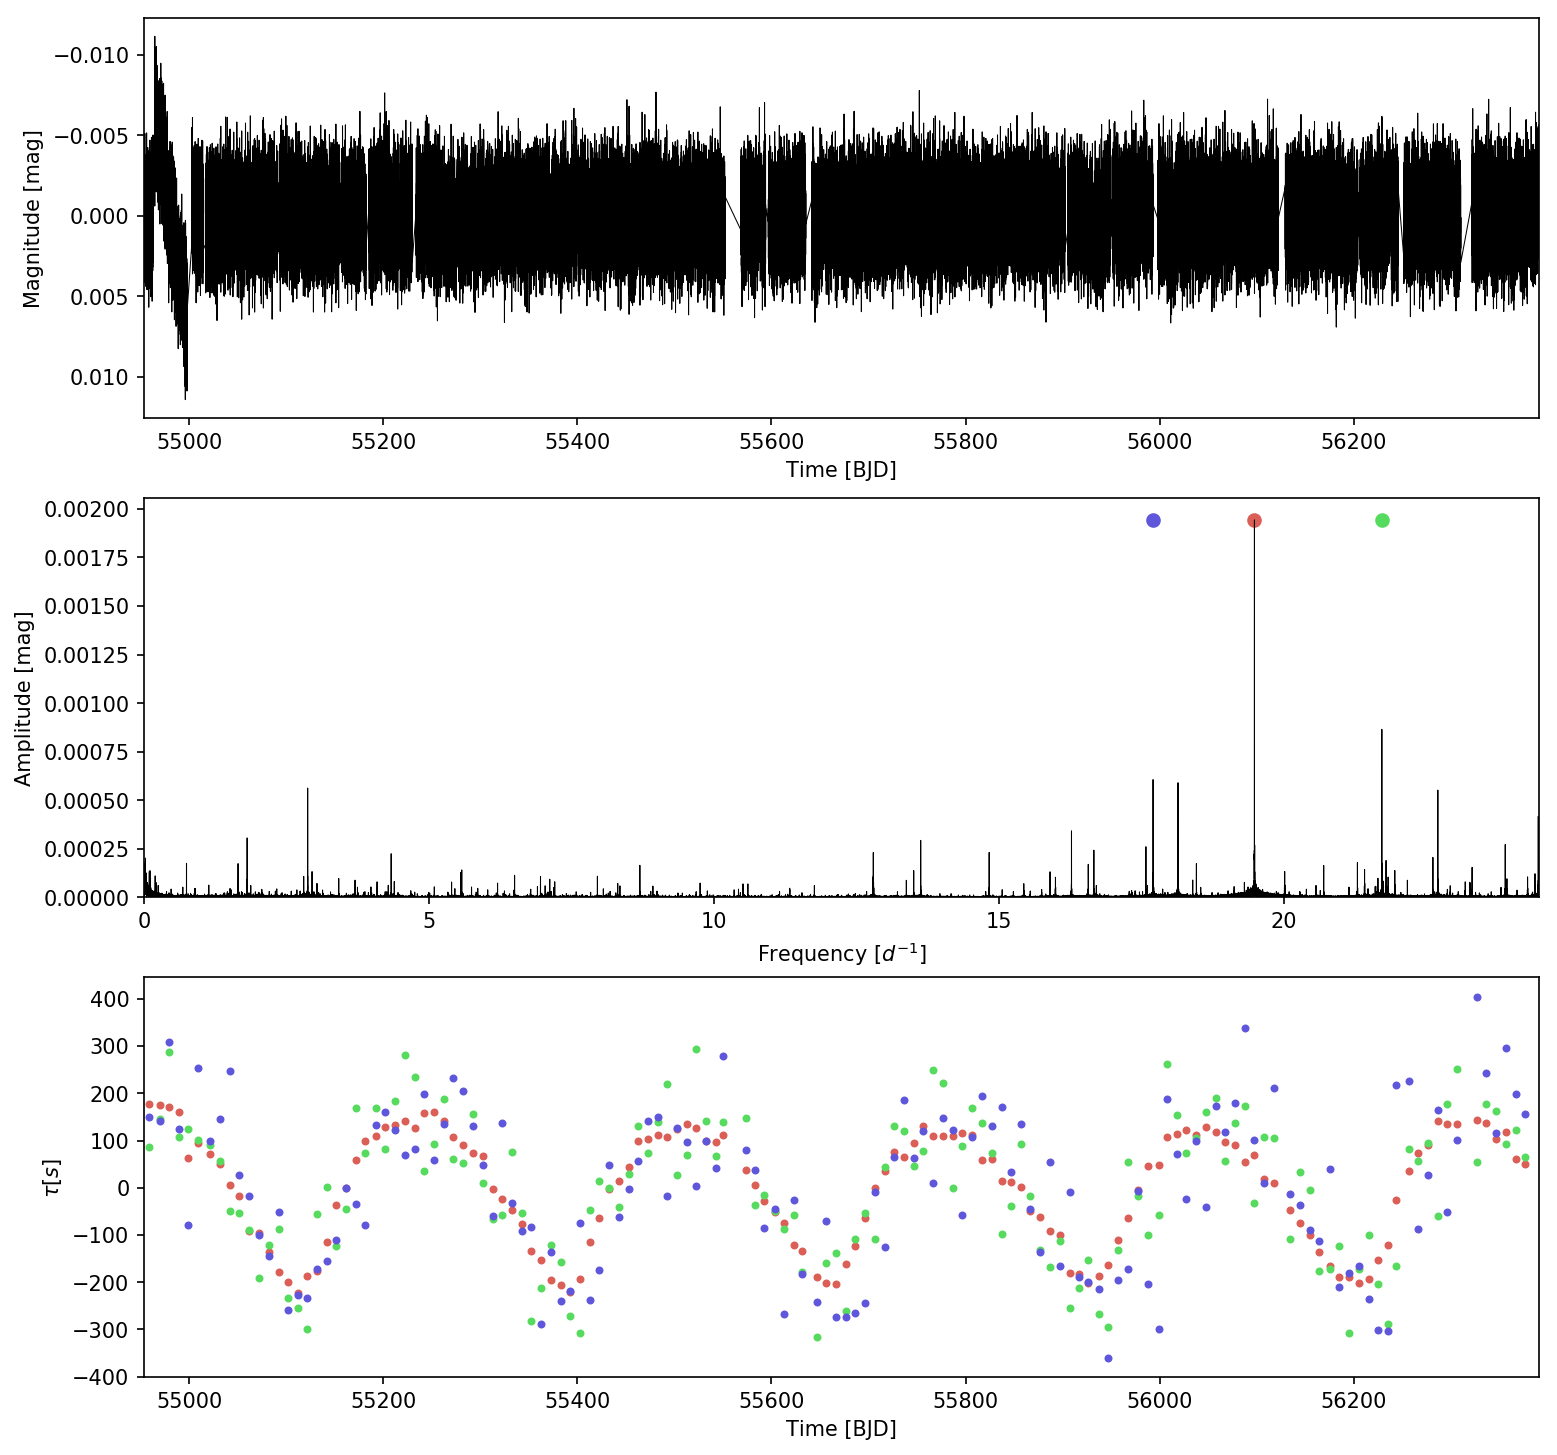

In [9]:
times, mags = np.loadtxt('kic9651065_lc.txt', usecols=(0,1)).T
td = TimeDelay(times, mags, max_peaks=3)
td.first_look()

In [10]:
td.freqs

array([19.4776743 , 21.71213399, 17.69941536])

Frequencies will be automatically calculated based on a model of the time delays using the Scipy Optimizer. You can of course supply your own via the `freqs=` keyword

In [11]:
td = TimeDelay(times, mags, freqs=[19.4776743 , 21.71213399, 17.69941536])

There's a nice clean time delay signal for several of the frequencies in `KIC9651065`. The colours on the periodogram are the pulsation modes corresponding to the time delay plot. 

We can reduce the segment size at the cost of scatter in the time delay signal

100%|██████████| 64028/64028 [00:00<00:00, 567913.99it/s]


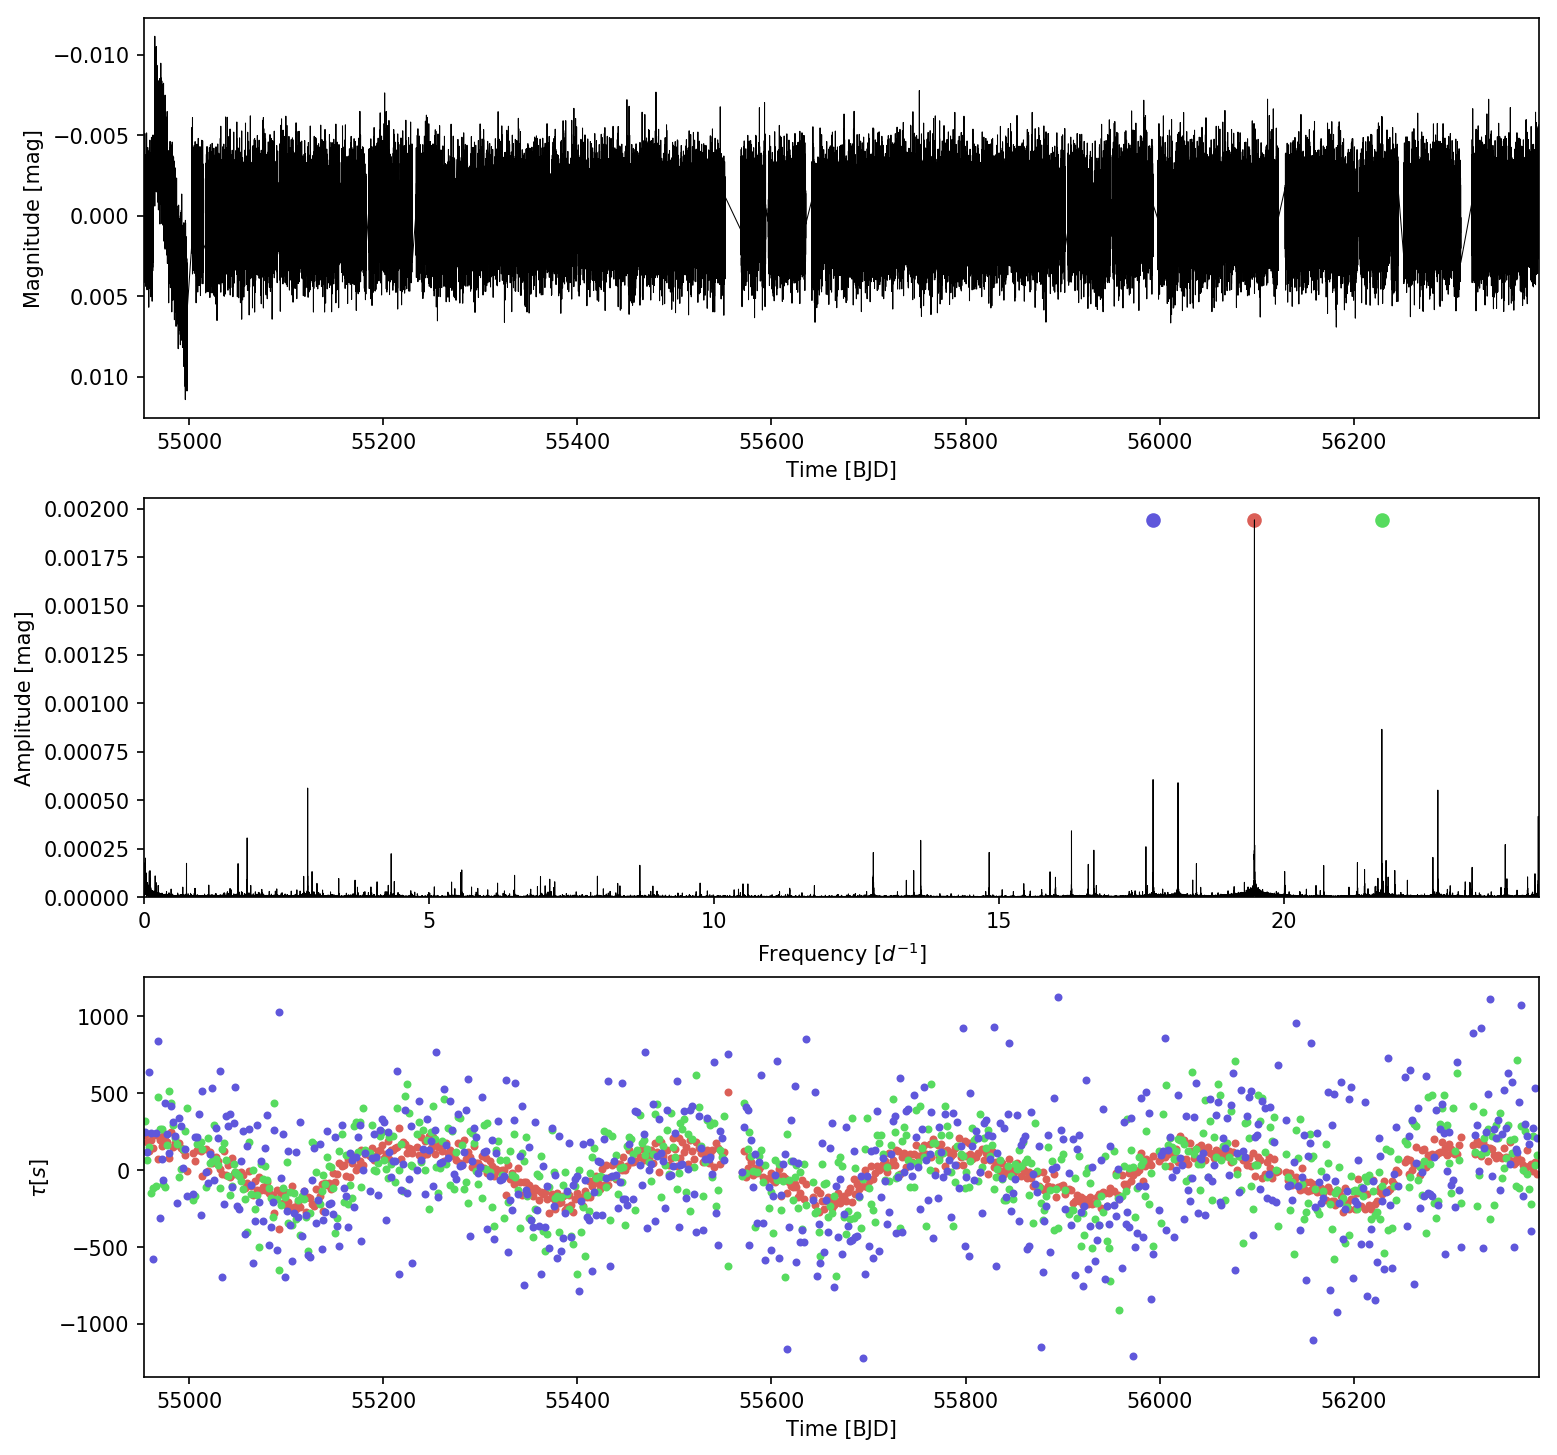

In [12]:
td.first_look(segment_size=2)

Finally, a somewhat experimental mode is to use a sliding Gaussian window over the lightcurve, instead of segmenting it.

100%|██████████| 1000/1000 [00:04<00:00, 246.27it/s]


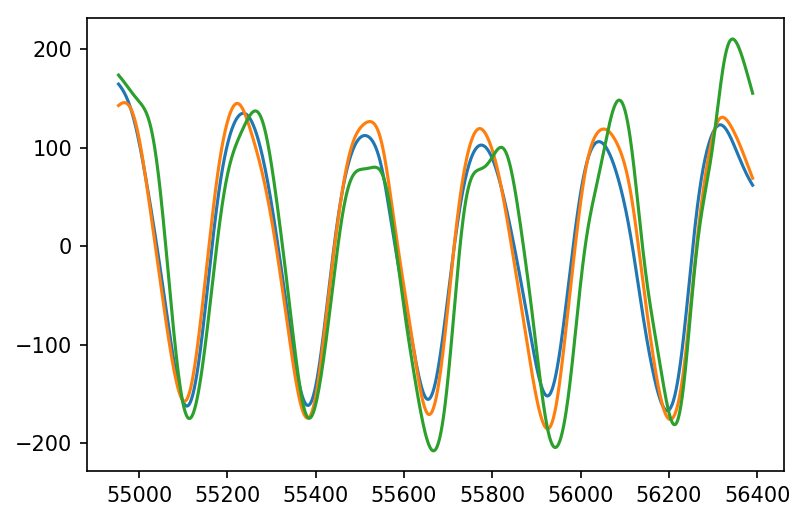

In [13]:
td.plot_wavelet_td(windows=1000, gwidth=25)

This method essentially convolves the lightcurve with a Gaussian window which is slid across the lightcurve. The phase is then calculated for each window, where gwidth determines the width of the Gaussian. If you want the values themselves, just call `wavelet_td` instead.